Dataset loaded successfully!
Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


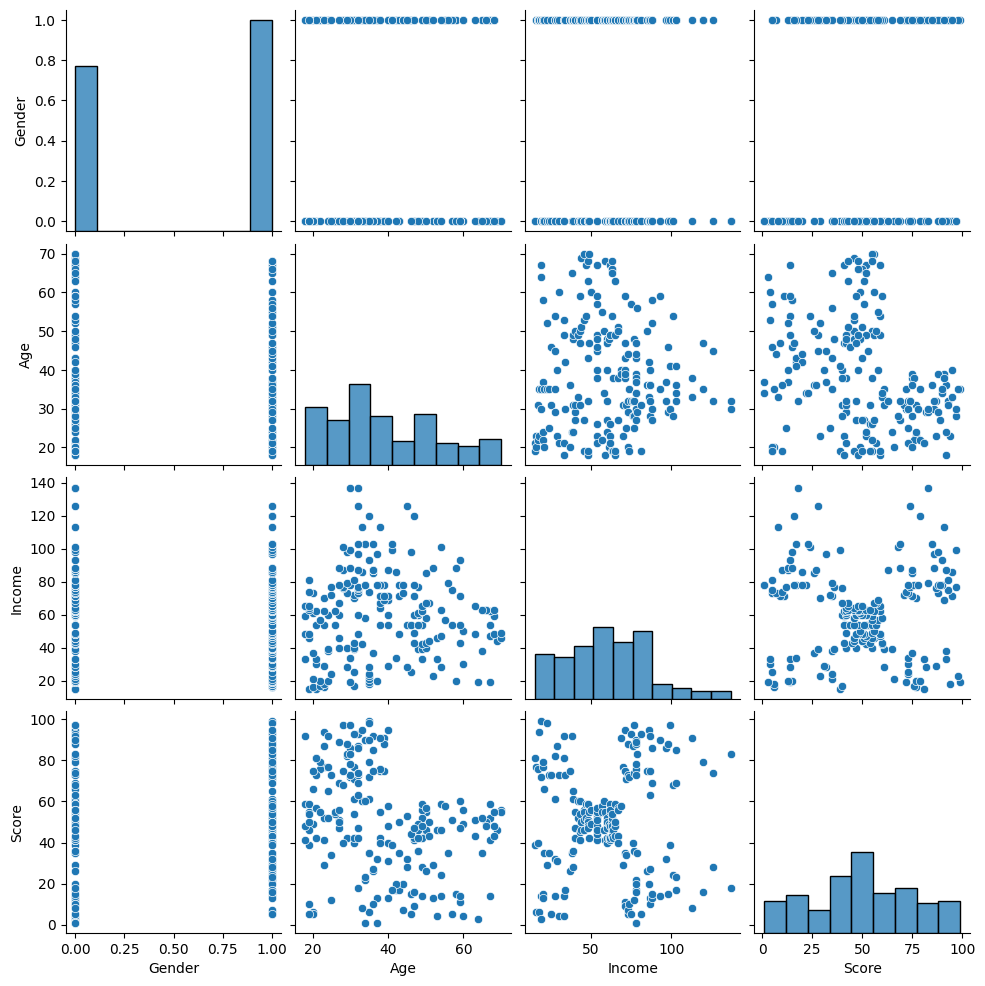

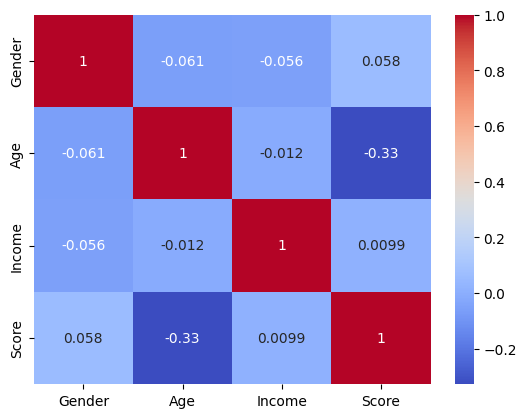

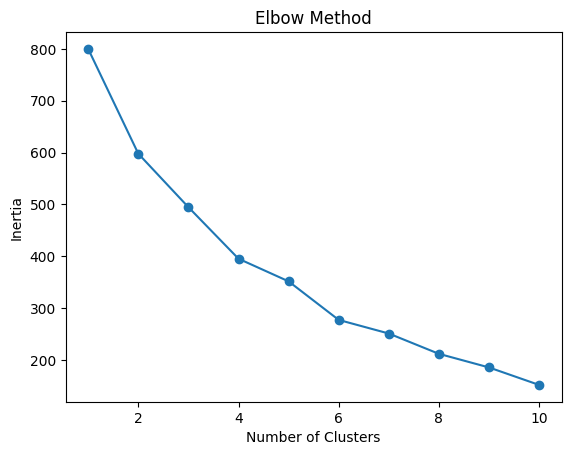

Silhouette Score: 0.27191023466188324


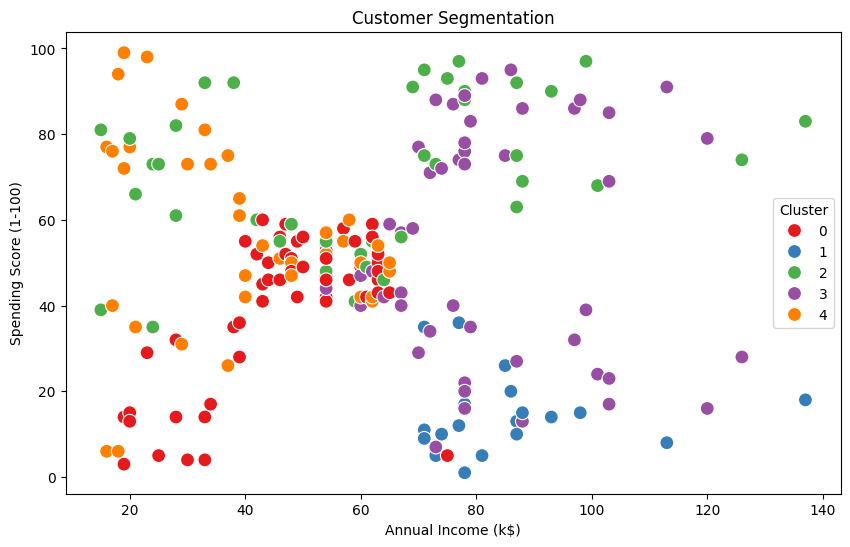

Results saved to Customer_Segmentation_Results.csv


In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 2: Load Pre-uploaded Dataset
# Save the dataset (e.g., `Mall_Customers.csv`) in your Colab environment beforehand.
# Make sure it's in the same directory as your code or provide the correct path.
dataset_path = 'Mall_Customers.csv'  # Replace with the correct path if needed
data = pd.read_csv(dataset_path)
print("Dataset loaded successfully!")
data.head()

# Step 3: Data Preprocessing
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Rename columns for easier handling
data.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

# Drop unnecessary columns
if 'CustomerID' in data.columns:
    data = data.drop('CustomerID', axis=1)

# Encode categorical variables like 'Gender'
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Step 4: EDA
# Pairplot to explore feature relationships
sns.pairplot(data)
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 5: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 6: Determine Optimal Clusters with the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 7: Apply K-Means Clustering
optimal_clusters = 5  # Update based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 8: Evaluate Clustering
sil_score = silhouette_score(scaled_data, data['Cluster'])
print("Silhouette Score:", sil_score)

# Step 9: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Step 10: Save Results
data.to_csv('Customer_Segmentation_Results.csv', index=False)
print("Results saved to Customer_Segmentation_Results.csv")


In [4]:
data.to_csv('Customer_Segmentation_Results.csv', index=False)
print("Results saved to Customer_Segmentation_Results.csv")


Results saved to Customer_Segmentation_Results.csv
